## Data Cleaning

In [4]:
import pandas as pd
import numpy as np


In [5]:
df=pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


 # Shows basic statistics for numeric columns

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Handling Missing Data

In [7]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Remove rows or columns for missing data

In [8]:
df = df.dropna(axis=1)

# Identify and remove duplicate records

In [9]:
df.duplicated().sum()


3

In [10]:
df = df.drop_duplicates()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Detect and handle outliers using appropriate techniques (e.g., z-scores, IQR).

<Axes: xlabel='petal_width'>

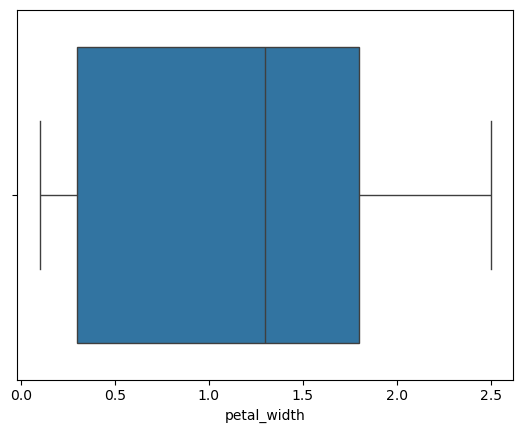

In [11]:
import seaborn as sns
sns.boxplot(x=df['petal_width']) # Plot boxplots to visually detect outliers


## Using IQR

In [12]:
Q1 = df['sepal_length'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['sepal_length'] < (Q1 - 1.5 * IQR)) | (df['sepal_width'] > (Q3 + 1.5 * IQR)))]


## Normalize

In [16]:
df=pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['sepal_length', 'sepal_width']] = scaler.fit_transform(df[['sepal_length', 'sepal_width']])
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,1.4,0.2,setosa
1,-1.143017,-0.124958,1.4,0.2,setosa
2,-1.385353,0.337848,1.3,0.2,setosa
3,-1.506521,0.106445,1.5,0.2,setosa
4,-1.021849,1.263460,1.4,0.2,setosa
...,...,...,...,...,...
145,1.038005,-0.124958,5.2,2.3,virginica
146,0.553333,-1.281972,5.0,1.9,virginica
147,0.795669,-0.124958,5.2,2.0,virginica
148,0.432165,0.800654,5.4,2.3,virginica
